<a href="https://colab.research.google.com/github/steffenmodest/Python_Examples/blob/main/MINIST_Augmentation_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook begleitend zum Video "Laden und Bearbeiten von MNIST"

### Importieren von TensorFlow, Keras und Numpy

Bevor wir die volle Funktionalität von NumPy nutzen können, müssen wir als aller erstes die Bibliothek importieren. Mit dem Kürzel "as" geben wir numpy einen "Spitznamen" und können für alle Funktionen von Numpy ab jetzt schreiben `np.some_function()`.

Wir lernen zwar erst im nächsten Video TensorFlow bzw. Keras kennen, jedoch bietet uns Keras eine einfache Möglichkeit den MNIST-Datensatz zu laden, da dieser bereits als eines der Datensätze in Keras integriert ist.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### MNIST Datensatz laden

Wir können ganz einfach durch die Angabe des Datensatzes unsere Daten festlegen und mit einer einfachen Funktion laden. 
Wir bekommen von der Funktion 2 verschiedene Tupel zurück, zum einen die Trainingsdaten (Bilder + Label) und zum anderen die Testdaten (ebenso Bilder + Label).

In [2]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Folgend wollen wir uns die Größe der geladenen Daten  ausgeben lassen
- geladene Daten sind Numpy-Arrays
  - 3D Matrizen
- 60.000 und 10.000 Bilder der Größe $28\cdot 28=784$ Pixel



In [ ]:
# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print(train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Wie wir bereits in Woche 1 kennen gelernt haben, handelt es sich bei den Pixeln um Werte von 0 bis 255. Dies wollen wir nachfolgend einmal validieren.


In [ ]:
# Minima und Maxima der Matrix
print(np.min(train_images))
print(np.max(train_images))

0
255


### Manipulation der Daten
Falls wir nur einen kleinen Ausschnitt der Daten benötigen oder mit weniger Daten lernen wollen, können wir das Eingabearray wie schon im Video zu NumPy gesehen, reduzieren. 

In [ ]:
train_images = train_images[:1000]

# Größe des neuen Trainingsdatensatzes (Länge, Höhe und Tiefe des Numpy-Arrays)
print(train_images.shape)

(1000, 28, 28)


### Notwendige Umformung für Verwendung in Keras


Wir haben bereits in der ersten Woche zum Thema "Wie lernen neuronale Netze?" kennengelernt, dass wir die gewünschte Ausgabe des Netzes (Labels) als Vektor der größe 10 erwarten. Jeder Eintrag in diesem Vektor sollte hierbei für eine Zahl von 0-9 stehen. Eine 5 würde somit an der 6. Stelle eine 1 enthalten und alle anderen Werte wären 0.

Die Labels aus dem MNIST-Datensatz sind zu Beginn nur einfache Zahlen und müssen daher von uns umgewandelt werden:
- Das Bild der handgeschriebenen 5 hat das Label `5`
- Wir wollen jedoch den folgenden Wert: `[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]`


In [ ]:
# Altes Label ist die Zahl der Klasse
# Beispiel: Das Bild mit der handgeschriebenen 5 hat das Label 5
print(f"Label davor: {train_labels[0]}")

# Umformung des Labels zu einem Vektor
# Dieser Vektor hat eine 1 an der Stelle 5 (beginnend bei 0) und sonst überall 0

# Haben 10 Klassen (Zahlen von 0-9) und somit 10 Neuronen für die Ausgabe
total_classes = 10
# Hilfsfunktion zur Durchführung der Vektorisierung
train_labels_vectorized = keras.utils.to_categorical(train_labels, total_classes)
print(f"Label danach: {train_labels_vectorized[0]}")

Label davor: 5
Label danach: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Bilder aus dem Datensatz anzeigen

Zur genaueren Inspektion dieses und anderer Datensätze eignet sich zum Beispiel die Bibliothek `matplotlib`.

Die nachfolgenden Befehle sollten nach dem letzten Video bereits bekannt sein.


In [ ]:
import matplotlib.pyplot as plt
# Magischer Befehl für die Verwendung von matplotlib in lokalen jupyter notebooks
%matplotlib inline

Wir hatten bereits ein paar kleine Änderungen an den geladenen Daten vorgenommen. Diese wollen wir folgend mit dem erneuten Laden der Daten rückgängig machen, um anschließend mit den usprüglichen Daten zu arbeiten.  

In [ ]:
# Erneutes Laden der Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

Wir wollen uns nun die einzelnen Bilder des MNIST-Datensatzes und eine zugehörige Legende anzeigen lassen, um ein Gefühl für die Daten zu erhalten.

Auf diese Weise lassen sich in einem späteren Video falsch klassifizierte Bilder des Netzes anzeigen.

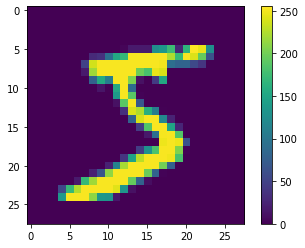

In [ ]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Wir wollen für das Trainieren unseres Netzes gerne normalisierte Pixelwerte zwischen 0 bis 1. Das Erreichen wir, indem wir jeden Eintrag in den `train_images` durch 255 teilen. 

In [ ]:
normalized_train_images = train_images / 255

Das Ergebnis der Normalisierung wollen wir uns ebenso ausgeben und sehen anhand der Legende unseren Erfolg.

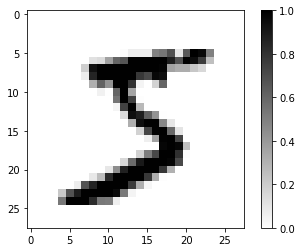

In [ ]:
# Als colormap (cmap) nutzen wir "binary", da wir nur zwischen weiß und schwarz interpolieren wollen
plt.imshow(normalized_train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### Datensatz bearbeiten (Noise hinzufügen)

Dies ist absolut optional und nur ein kleiner Ausblick in das Thema *Data Augmentation*, worauf wir in Woche 4 genauer eingehen wollen.


Wir erzeugen eine Matrix der Größe 28 x 28 mit Werten zwischen 0 und 1 (Befehl sollte vom NumPy Video bekannt sein). Die zufällig erzeugt Matrix wollen wir mit dem gleich großen Trainingsbild addieren, um dem Bild Rauschen hinzuzufügen.

Mittels dieses Rauschens haben wir ein neues Bild erzeugt, welches wir für das Training unseres Netzes verwenden könnten.


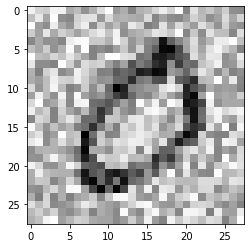

In [ ]:
# Noise kann beliebig gewählt werden mit Wahl des Zufallsgenerators
noise_matrix = np.random.random((28,28))
# Addieren der Matrix mit Noise auf die ursprüngliche Matrix
new_train_data = normalized_train_images[1] + noise_matrix
# Neues Bild anzeigen
plt.imshow(new_train_data, cmap=plt.cm.binary)
plt.show()

### Datensatzwerte erzeugen 

Eine weitere Möglichkeit den Datensatz zu bearbeiten (erweitern) bietet die Transponierung.
`new_train_data = train_images[1].T` erzeugt eine an der Diagonalen gespiegelte 0, welche weiterhin als 0 klassifiziert werden soll, aber aufgrund der Spiegelung anders aussieht.

Die Funktion `np.rot90` ermöglicht uns Bilder um Vielfache von 90° zu drehen und auf diese Weise neue Daten zu generieren. Eine 0 die um 180° gedreht wurde, also auf dem Kopf steht, sollte weiterhin als 0 klassifiziert werden.

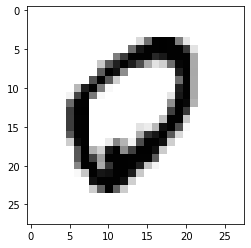

In [ ]:
# 2-fache Drehung um 90° (auf dem Kopf stehende 0)
flipped_zero = np.rot90(normalized_train_images[1])
flipped_zero = np.rot90(flipped_zero)

# Neues Bild anzeigen
plt.imshow(flipped_zero, cmap=plt.cm.binary)
plt.show()

Anschließend wollen wir das neu generierte Bild an den bestehenden Datensatz anhängen. 
Hierfür müssen beide nd-Arrays, welche wir aneinander hängen, die gleiche Dimension (Größe) besitzen. Also formen wir flipped_zero von einem 2D-Array zu einem 3D-Array.

In [ ]:
# flipped_zero wird zu Array der Länge 1 mit einer 28x28 Matrix
flipped_zero = flipped_zero.reshape(1,28,28)

# Damit können wir das 1x28x28 flipped_zero Array mit dem 60000x28x28 train_images Array zusammenfügen
extended_train_images = np.append(normalized_train_images, flipped_zero, axis=0)
print(extended_train_images.shape)

(60001, 28, 28)


### Kleiner Hinweis am Ende

Warum haben wir uns bereits jetzt mit dem Thema *Data Augmentation* beschäftigt?

Der MNIST Datensatz ist eigentlich nicht komplex genung, um die Daten beliebig zu manipulieren und trotzdem sinnvolle Erkenntnisse über den Datensatz zu gewinnen oder diesen mit neuen Daten zu erweitern, um daran noch besser zu lernen.
- Der Datensatz hat sich für wissenschaftliche Zwecke bewährt und wurde mehrfach verbessert
- Erweiterung um neue Daten nicht notwendig

Wir lernen später in Woche 4, wie man mit anspruchsvollen Datensätzen arbeitet (z.B. `tf_flowers` mit wenig Daten) und werden dann eventuell mittels Data Augemntation neue Daten erzeugen müssen. 

Der viel wichtigere Grund ist jedoch, dass wir Methoden und Tools kennengelernt haben, die uns dabei helfen einen Eindruck von den Daten zu bekommen. Das ist besonders wichtig wenn man an einem eigenen Image Recognition Projekt arbeitet. Es ist wichtig die Daten zu verstehen und zu optimieren. Daher finde wir es sinnvoll, wenn vorab schonmal ein bisschen mit den Daten herumgespielt wird.
